# Model

In [1]:
using ReachabilityAnalysis, Plots

In [2]:
@taylorize function laubloomis!(dx, x, params, t)
    dx[1] = 1.4*x[3] - 0.9*x[1]
    dx[2] = 2.5*x[5] - 1.5*x[2]
    dx[3] = 0.6*x[7] - 0.8*(x[2]*x[3])
    dx[4] = 2 - 1.3*(x[3]*x[4])
    dx[5] = 0.7*x[1] - (x[4]*x[5])
    dx[6] = 0.3*x[1] - 3.1*x[6]
    dx[7] = 1.8*x[6] - 1.6*(x[2]*x[7])
    return dx
end

In [3]:
W = [0.01, 0.05, 0.1]; # box range of the initial set

e4 = [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]

# initial-value problem
X0c = [1.2, 1.05, 1.5, 2.4, 1.0, 0.1, 0.45];

In [4]:
GC.gc()

In [7]:
X0 = Hyperrectangle(X0c, fill(W[1], 7))
prob = @ivp(x' = laubloomis!(x), dim: 7, x(0) ∈ X0);

[@time sol1 = solve(prob, tspan=(0.0, 20.0), TMJets(abs_tol=1e-11,orderT=7,orderQ=1, adaptive=true)) for i in 1:4]

sol1 = solve(prob, tspan=(0.0, 20.0), TMJets(abs_tol=1e-11,orderT=7,orderQ=1, adaptive=true))
@time sol1z = overapproximate(sol1, Zonotope)
@show ρ(e4, sol1z[end]) + ρ(-e4, sol1z[end])

  0.980010 seconds (14.07 M allocations: 974.824 MiB, 23.33% gc time)
  0.895005 seconds (14.07 M allocations: 974.829 MiB, 23.85% gc time)
  0.926957 seconds (14.07 M allocations: 974.816 MiB, 26.08% gc time)
  1.230340 seconds (14.07 M allocations: 974.811 MiB, 46.39% gc time)
  0.339747 seconds (6.83 M allocations: 451.364 MiB, 23.67% gc time)
ρ(e4, sol1z[end]) + ρ(-e4, sol1z[end]) = 0.00422669680166976


0.00422669680166976

In [8]:
sum([0.980010, 0.895005, 0.926957, 1.230340])/4

1.008078

In [9]:
GC.gc()

In [10]:
X0 = Hyperrectangle(X0c, fill(W[2], 7))
prob = @ivp(x' = laubloomis!(x), dim: 7, x(0) ∈ X0);
[@time sol2 = solve(prob, tspan=(0.0, 20.0), TMJets(abs_tol=1e-12,orderT=7,orderQ=1,adaptive=false)) for _ in 1:4]

sol2 = solve(prob, tspan=(0.0, 20.0), TMJets(abs_tol=1e-12,orderT=7,orderQ=1,adaptive=false))
sol2z = overapproximate(sol2, Zonotope)
@show ρ(e4, sol2z[end]) + ρ(-e4, sol2z[end])

  1.116630 seconds (17.58 M allocations: 1.186 GiB, 24.59% gc time)
  1.205613 seconds (17.58 M allocations: 1.185 GiB, 22.68% gc time)
  1.097776 seconds (17.58 M allocations: 1.186 GiB, 23.07% gc time)
  1.118631 seconds (17.58 M allocations: 1.185 GiB, 27.48% gc time)
ρ(e4, sol2z[end]) + ρ(-e4, sol2z[end]) = 0.017462225836897716


0.017462225836897716

In [11]:
sum([1.116630, 1.205613, 1.097776, 1.118631]) / 4

1.1346625000000001

In [12]:
X0 = Hyperrectangle(X0c, fill(W[3], 7))
prob = @ivp(x' = laubloomis!(x), dim: 7, x(0) ∈ X0);
[@time sol3 = solve(prob, tspan=(0.0, 20.0), TMJets(abs_tol=1e-12,orderT=7,orderQ=1,adaptive=false)) for _ in 1:4]

sol3 = solve(prob, tspan=(0.0, 20.0), TMJets(abs_tol=1e-12,orderT=7,orderQ=1,adaptive=false))
sol3z = overapproximate(sol3, Zonotope)
@show ρ(e4, sol3z[end]) + ρ(-e4, sol3z[end])

  1.194016 seconds (17.47 M allocations: 1.169 GiB, 25.01% gc time)
  1.378723 seconds (17.47 M allocations: 1.169 GiB, 28.21% gc time)
  1.149317 seconds (17.47 M allocations: 1.169 GiB, 25.34% gc time)
  1.096688 seconds (17.47 M allocations: 1.169 GiB, 27.50% gc time)
ρ(e4, sol3z[end]) + ρ(-e4, sol3z[end]) = 0.03362699736716124


0.03362699736716124

In [13]:
sum([1.194016, 1.378723, 1.149317, 1.096688]) / 4

1.204686

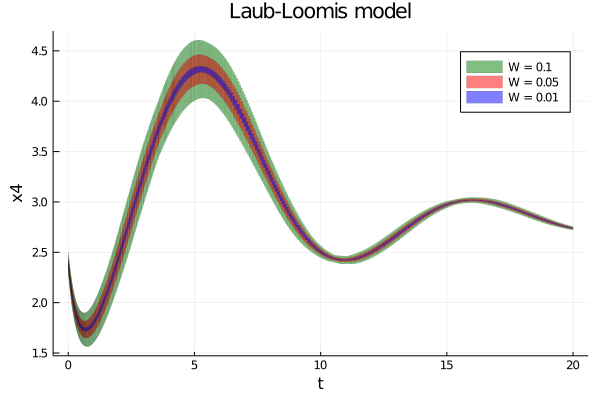

In [14]:
plot(sol3z, vars=(0, 4), color=:green, lw=0.1, lab="W = $(W[3])", title="Laub-Loomis model", xlab="t", ylab="x4")
plot!(sol2z, vars=(0, 4), color=:red,   lw=0.1, lab="W = $(W[2])")
plot!(sol1z, vars=(0, 4), color=:blue,  lw=0.1, lab="W = $(W[1])")

## Plot

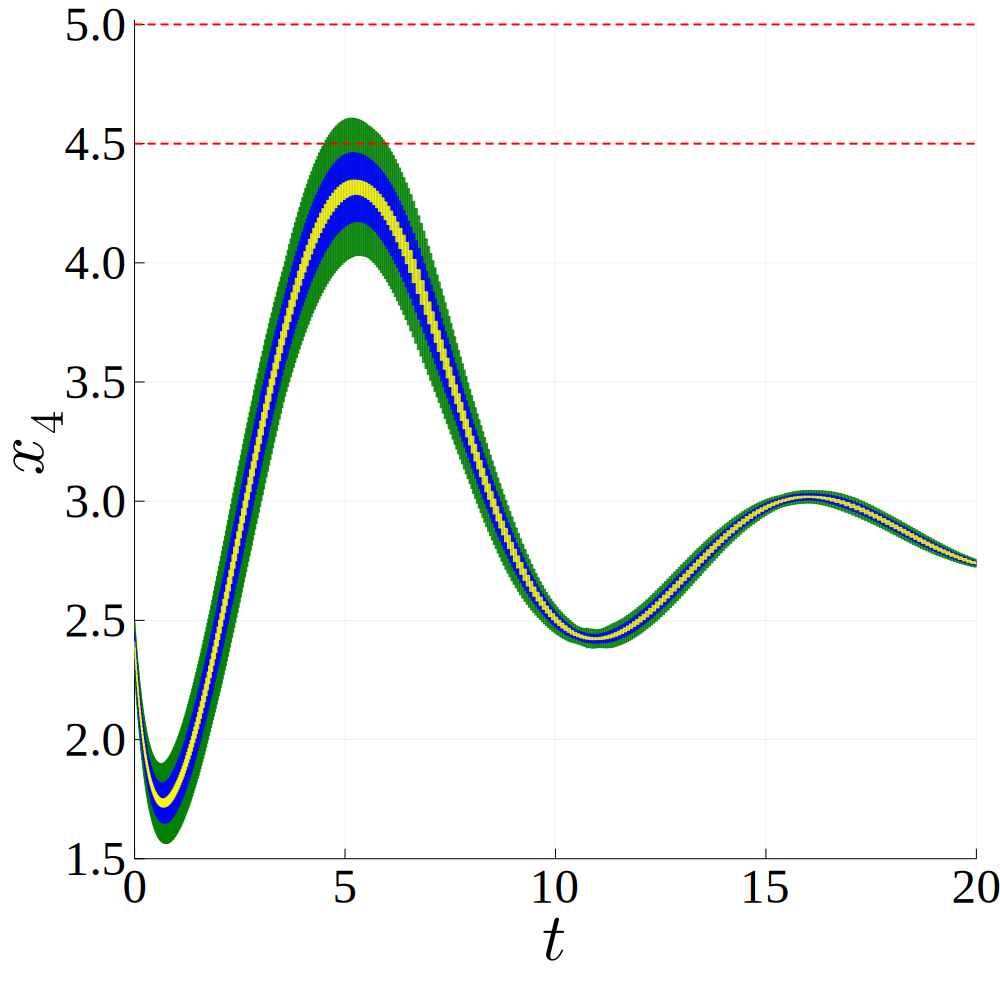

In [16]:
using LaTeXStrings, Plots, Plots.PlotMeasures, LaTeXStrings

fig = Plots.plot()

Plots.plot!(fig, sol3z,  vars=(0, 4), linecolor="green", color=:green, alpha=0.8)
Plots.plot!(fig, sol2z, vars=(0, 4), linecolor="blue", color=:blue, alpha=0.8)
Plots.plot!(fig, sol1z, vars=(0, 4), linecolor="yellow", color=:yellow, alpha=0.8,
    tickfont=font(30, "Times"), guidefontsize=45,
    xlab=L"t", #\raisebox{-0.5mm}{\textcolor{white}{.}}",
    ylab=L"x_4", # \raisebox{2mm}{\textcolor{white}{.}}",
    xtick=[0., 5., 10., 15., 20.], ytick=[1.5, 2., 2.5, 3., 3.5, 4., 4.5, 5.],
    xlims=(0., 20.), ylims=(1.5, 5.02),
    bottom_margin=6mm, left_margin=2mm, right_margin=4mm, top_margin=3mm,
    size=(1000, 1000))

Plots.plot!(fig, x->x, x->4.5, 0., 20., line=2, color="red", linestyle=:dash, legend=nothing)
Plots.plot!(fig, x->x, x->5., 0., 20., line=2, color="red", linestyle=:dash, legend=nothing)

In [17]:
savefig(fig, "ARCH-COMP20-JuliaReach-LaubLoomis_4.pdf")